In [2]:
import pandas as pd
churn_data = pd.read_csv('data/churn.csv')
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
import pandas as pd
import matplotlib.pyplot as plt


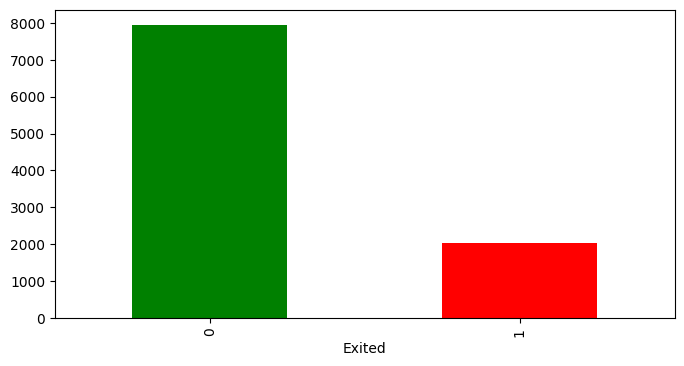

In [25]:
# 9.1 Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.
exited_counts = churn_data['Exited'].value_counts()
fig = plt.figure(figsize=(8, 4))
exited_counts.plot(kind='bar', color=['green', 'red'])
legend=True
# Из графика видно, что ушедших клиентов в 4 раза меньше, чем лояльных

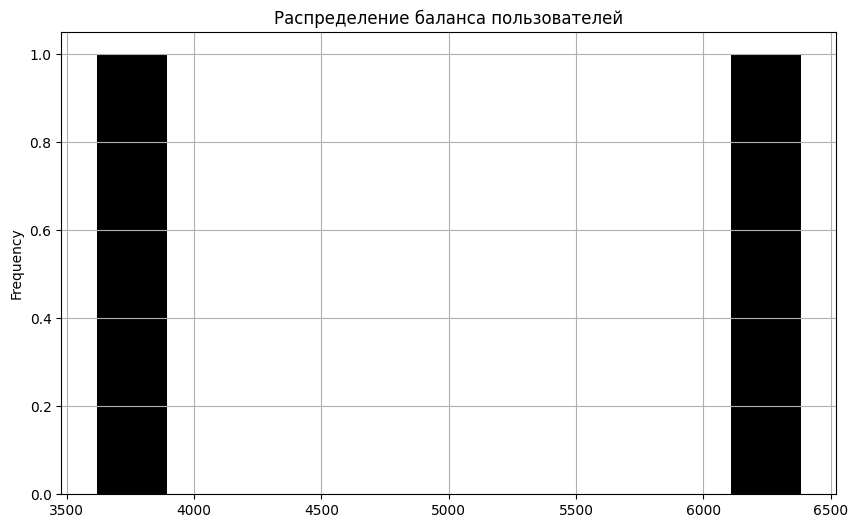

In [9]:
# 9.2  Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов.
#Опишите распределение и сделайте выводы.
balance_counts=(churn_data['Balance']>2500).value_counts()
balance_counts.plot(
    kind='hist',
    figsize=(10, 6),
    title='Распределение баланса пользователей',
    grid = True,
    color = 'black',
    bins=10
);
# Распределение пользователей 50:50

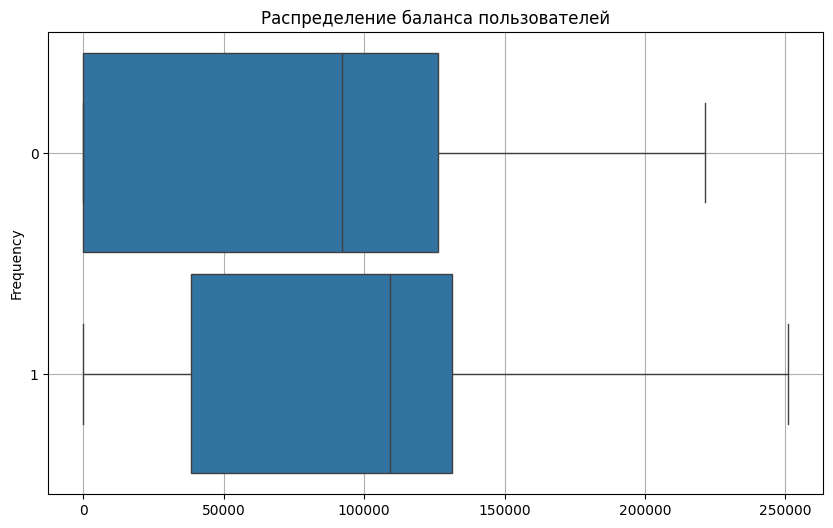

In [26]:
# 9.3 Посмотрите на распределение баланса клиента в разрезе признака оттока.
# Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? 
# Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(
    data=churn_data,
    y='Exited',
    x='Balance',
    orient='h',
    width=0.9
)
boxplot.set_title('Распределение баланса клиента');
boxplot.set_xlabel('Баланс');
boxplot.set_ylabel('Клиенты :1 — ушедший клиент, 0 — лояльный клиент');
boxplot.grid()
balance_counts.plot(
    kind='hist',
    figsize=(10, 6),
    title='Распределение баланса пользователей',
    grid = True,
    color = 'black',
    bins=10
);
# Ушедшие клиенты в среднем имеют больше средств на счете, возможно, им предложили лучшие условия в других банках. 
# Лояльные клиенты могут иметь пустые счета, вероятно, не используют какие-либо программы , следовательно, не интересуются лучшими условиями 

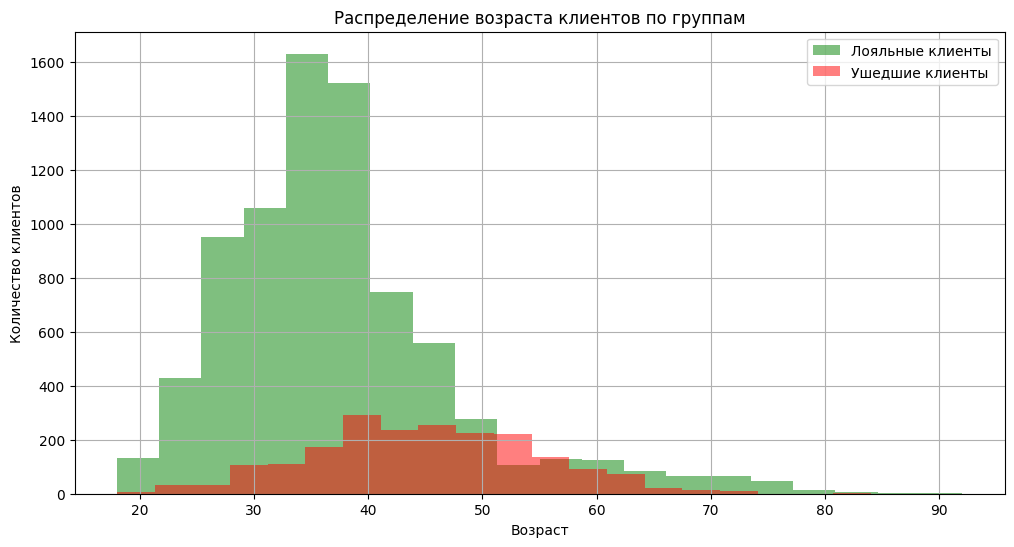

In [ ]:
# 9.4  Посмотрите на распределение возраста в разрезе признака оттока.
# В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?
plt.figure(figsize=(12, 6))

# Разделяем данные по статусу клиента
loyal = churn_data[churn_data['Exited'] == 0]['Age']
churned = churn_data[churn_data['Exited'] == 1]['Age']
# Строим гистограммы для каждой группы
plt.hist(loyal, bins=20, alpha=0.5, color='green', label='Лояльные клиенты')
plt.hist(churned, bins=20, alpha=0.5, color='red', label='Ушедшие клиенты')

plt.title('Распределение возраста клиентов по группам')
plt.xlabel('Возраст')
plt.ylabel('Количество клиентов')
plt.legend()
plt.grid(True)
plt.show()
# потенциальных выбросов болье у клиентов старше 65 лет.
# Банку стоит обратить внимание на лояльных клиентов 35-40 лет, ушедших клиентов 38-55 лет с целью разработки программ удержания.


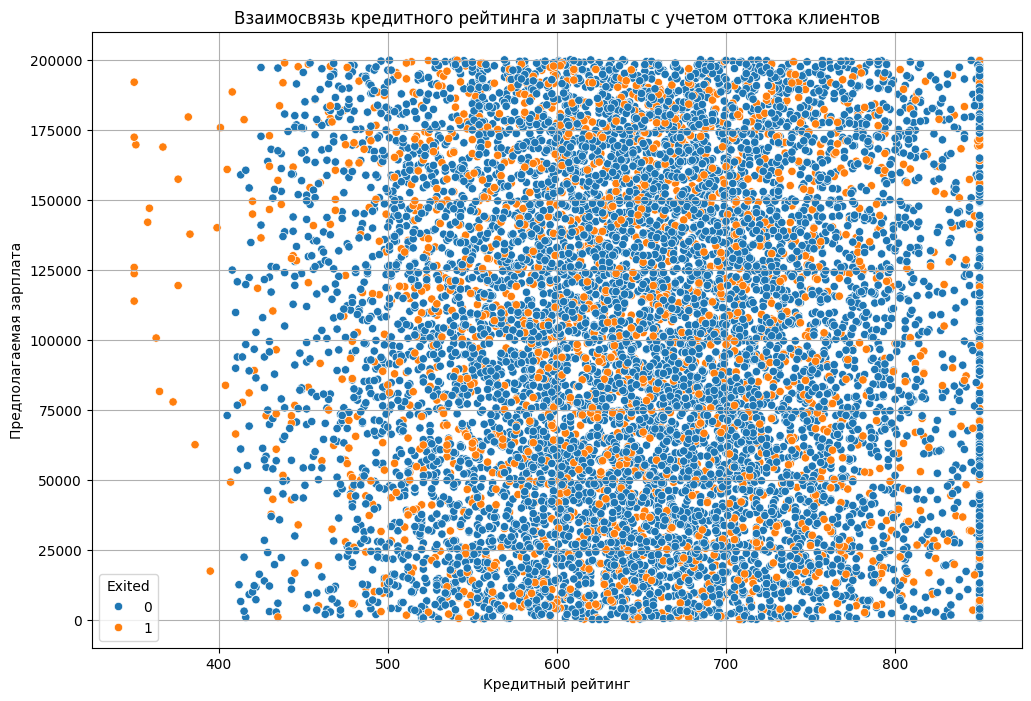

In [ ]:
#9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. 
# Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? 
# Если не видите явной взаимосвязи, укажите это.
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(
    data=churn_data,
    x='CreditScore',
    y='EstimatedSalary',
    hue='Exited',
    color={0: 'green', 1: 'red'}),
plt.title('Взаимосвязь кредитного рейтинга и зарплаты с учетом оттока клиентов')
plt.xlabel('Кредитный рейтинг')
plt.ylabel('Предполагаемая зарплата')
plt.grid(True)
plt.show()
#не наблюдается явной взаимосвязи между кредитным рейтингом, зарплатой и оттоком клиентов

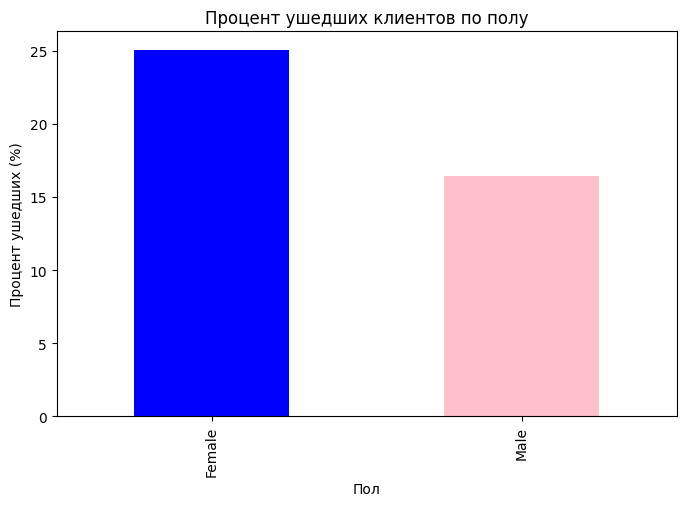

In [ ]:
# 9.6 Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это
exit_rates = churn_data.groupby('Gender')['Exited'].mean() * 100
plt.figure(figsize=(8, 5))
exit_rates.plot(kind='bar', color=['blue', 'pink'])
plt.title('Процент ушедших клиентов по полу')
plt.ylabel('Процент ушедших (%)')
plt.xlabel('Пол')
plt.show()

# Чаще уходят мужчины

NumOfProducts  Exited
1              0         3675
               1         1409
2              0         4242
               1          348
3              1          220
               0           46
4              1           60
Name: count, dtype: int64

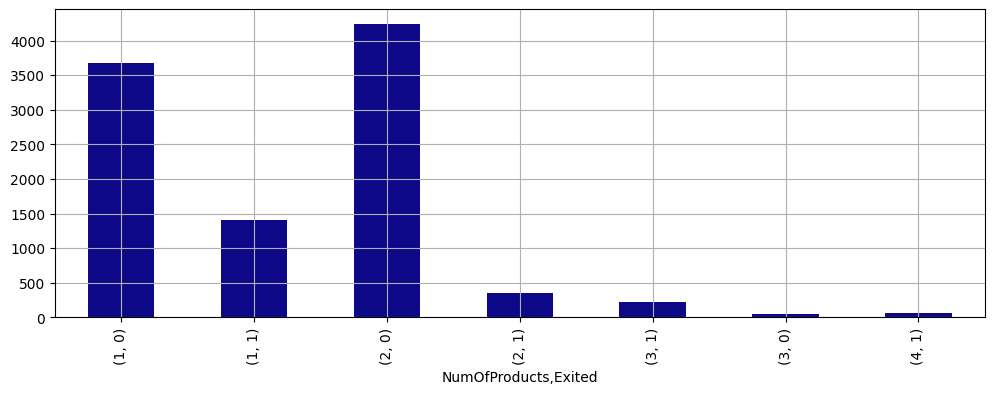

In [ ]:
# 9.7 Как отток клиентов зависит от числа приобретённых у банка услуг?
# Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.
import plotly
import plotly.express as px
 
number_of_products= churn_data.groupby('NumOfProducts')['Exited'].value_counts()
display(number_of_products)
number_of_products.plot(
    kind='bar',
    grid=True,
    figsize=(12, 4),
    colormap='plasma'
);
# Чем больше количество услуг, тем меньше отток

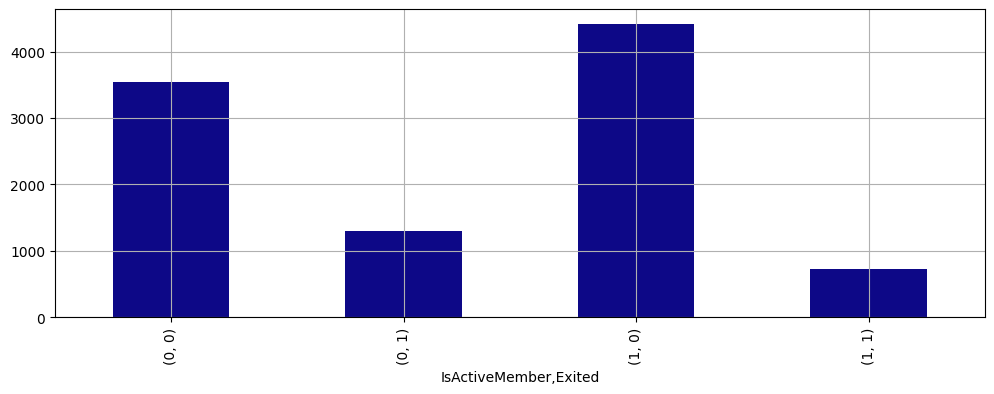

In [60]:
# 9.8  Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это.
# Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?


active_clients= churn_data.groupby('IsActiveMember')['Exited'].value_counts()
active_clients.plot(
    kind='bar',
    grid=True,
    figsize=(12, 4),
    colormap='plasma'
);

In [ ]:
# 9.9 В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. 
# Предположите, с чем это может быть связано.
import plotly
import plotly.express as px
country_churn = churn_data.groupby('Geography')['Exited'].mean().reset_index(name='ChurnRate')
fig = px.choropleth(
    data_frame=country_churn,
    locations='Geography',
    locationmode='country names',
    color='ChurnRate',
    color_continuous_scale='Reds',
    title='Доля ушедших клиентов по странам',
    width=800,
    height=500,
    scope='world'
)
fig.show()
#Germany

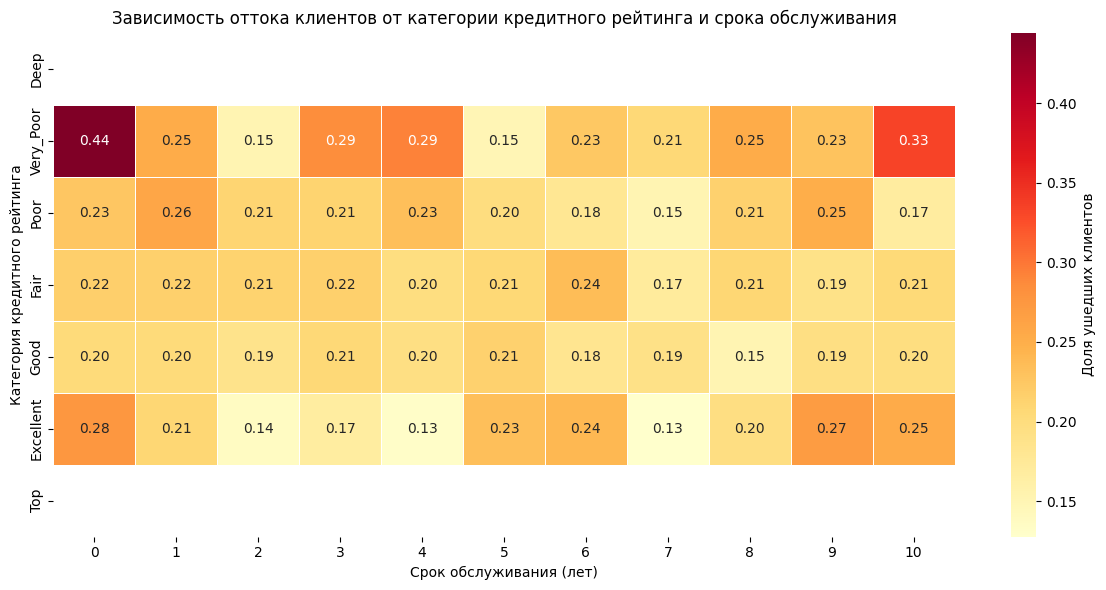

In [ ]:
#Переведите числовой признак CreditScore в категориальный. 
# Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. 
# Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"
    
# Применяем функцию к столбцу CreditScore
churn_data['CreditScoreCat'] = churn_data['CreditScore'].apply(get_credit_score_cat)

# Создаем сводную таблицу
pivot_table = pd.pivot_table(
    data=churn_data,
    index='CreditScoreCat',
    columns='Tenure',
    values='Exited',
    aggfunc='mean'
)

# Упорядочиваем категории для правильного отображения
category_order = ['Deep', 'Very_Poor', 'Poor', 'Fair', 'Good', 'Excellent', 'Top']
pivot_table = pivot_table.reindex(category_order)

# Строим тепловую карту
plt.figure(figsize=(12, 6))
sns.heatmap(
    pivot_table,
    annot=True,
    fmt=".2f",
    cmap="YlOrRd",
    linewidths=.5,
    cbar_kws={'label': 'Доля ушедших клиентов'}
)

plt.title('Зависимость оттока клиентов от категории кредитного рейтинга и срока обслуживания')
plt.xlabel('Срок обслуживания (лет)')
plt.ylabel('Категория кредитного рейтинга')
plt.tight_layout()
plt.show()
# Категория клиентов с кредитным рейтингом Deep при сроке обслуживания 0 лет уходит чаще всего 